In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/train.csv')
store_df = pd.read_csv('data/store.csv')
df_test = pd.read_csv('data/test.csv')
df_submit = pd.read_csv('data/sample_submission.csv')

C:\Users\kgavahi\AppData\Local\Temp\ipykernel_21732\4141378031.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/train.csv')


In [3]:
# Remove rows where 'open' column is zero
df = df.loc[df['Open'] != 0]

# Remove rows where 'Sales' column is zero
df = df.loc[df['Sales'] != 0]

In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'date' column to datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])  # Convert the 'date' column to datetime format

# Add a new column 'day_of_year' which represents the day of the year
df['DayOfYear'] = df['Date'].dt.dayofyear
df_test['DayOfYear'] = df_test['Date'].dt.dayofyear

# Extract month and season
df['Month'] = df['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

(array([7.0000e+00, 1.3400e+02, 7.2300e+02, 2.0340e+03, 4.4830e+03,
        8.9070e+03, 1.4906e+04, 2.2511e+04, 3.2541e+04, 4.2084e+04,
        5.0082e+04, 5.5426e+04, 5.8603e+04, 5.9258e+04, 5.7526e+04,
        5.3574e+04, 4.8961e+04, 4.4591e+04, 4.0642e+04, 3.5245e+04,
        3.0488e+04, 2.6180e+04, 2.2823e+04, 1.9274e+04, 1.6759e+04,
        1.4188e+04, 1.2038e+04, 1.0058e+04, 8.4940e+03, 7.0150e+03,
        5.9830e+03, 5.0000e+03, 4.3130e+03, 3.6970e+03, 3.2260e+03,
        2.7500e+03, 2.3570e+03, 2.0170e+03, 1.8650e+03, 1.6310e+03,
        1.4620e+03, 1.1990e+03, 1.0920e+03, 1.0290e+03, 8.8900e+02,
        7.9300e+02, 7.3200e+02, 6.0300e+02, 5.5300e+02, 4.7600e+02,
        4.1300e+02, 3.4800e+02, 3.3600e+02, 2.5900e+02, 2.5000e+02,
        2.0400e+02, 1.8100e+02, 1.3700e+02, 1.0600e+02, 1.0900e+02,
        9.7000e+01, 6.4000e+01, 7.0000e+01, 6.4000e+01, 6.8000e+01,
        4.6000e+01, 3.9000e+01, 4.9000e+01, 3.6000e+01, 3.0000e+01,
        2.8000e+01, 2.4000e+01, 2.9000e+01, 1.80

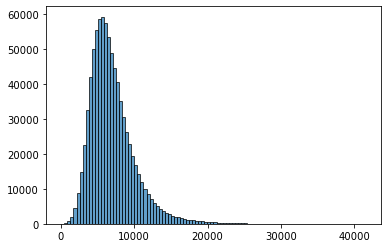

In [5]:
# Plot histogram
plt.hist(df['Sales'], bins=100, edgecolor='black', alpha=0.7)

In [13]:
target_store_number = 10

# Filtering the DataFrame by store
target_store_df = df.loc[df['Store'] == target_store_number]

(array([ 4.,  2.,  3.,  6.,  4., 16., 20., 28., 38., 49., 52., 36., 40.,
        36., 34., 30., 33., 33., 31., 34., 33., 27., 17., 17., 24., 15.,
        11., 15.,  7., 14.,  8.,  7., 10., 10.,  6.,  4.,  7.,  3.,  5.,
         3.,  5.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([3481.  , 3602.06, 3723.12, 3844.18, 3965.24, 4086.3 , 4207.36,
        4328.42, 4449.48, 4570.54, 4691.6 , 4812.66, 4933.72, 5054.78,
        5175.84, 5296.9 , 5417.96, 5539.02, 5660.08, 5781.14, 5902.2 ,
        6023.26, 6144.32, 6265.38, 6386.44, 6507.5 , 6628.56, 6749.62,
        6870.68, 6991.74, 7112.8 , 7233.86, 7354.92, 7475.98, 7597.04,
        7718.1 , 7839.16, 7960.22, 8081.28, 8202.34, 8323.4 , 8444.46,
        8565.52, 8686.58, 8807.64, 8928.7 , 9049.76, 9170.82, 9291.88,
        9412.94, 9534.  ]),
 <BarContainer object of 50 artists>)

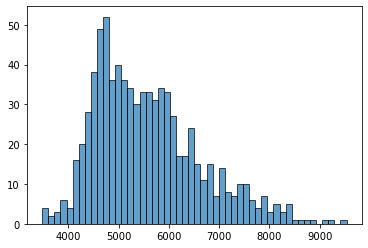

In [14]:
plt.hist(target_store_df['Sales'], bins=50, edgecolor='black', alpha=0.7)

target store with promo:  7275.36
target store without promo:  5512.419953596288


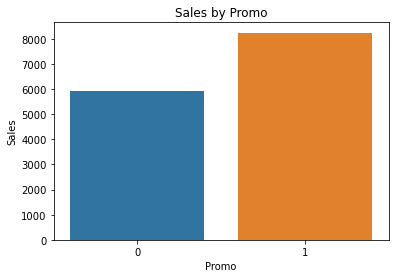

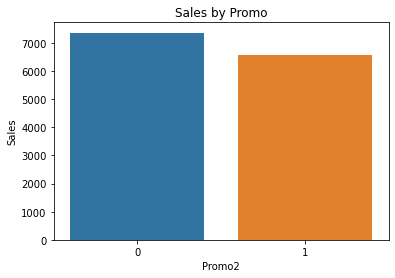

<AxesSubplot:>

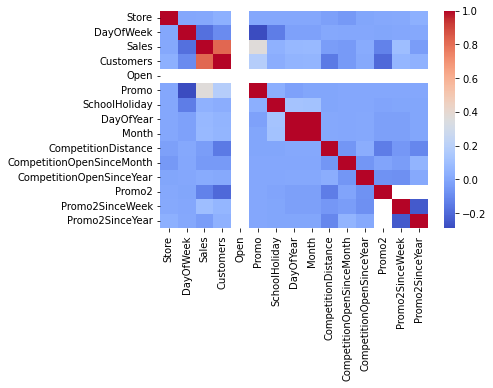

In [27]:
# Calculate the mean of 'sales' for rows where 'promo' column is 1
mean_sales_with_promo = target_store_df.loc[target_store_df['Promo'] == 1, 'Sales'].mean()
print('target store with promo: ', mean_sales_with_promo)

mean_sales_without_promo = target_store_df.loc[target_store_df['Promo'] == 0, 'Sales'].mean()
print('target store without promo: ', mean_sales_without_promo)

df_merged = df.merge(store_df, on='Store', how='inner')
# Bar plot of Sales by Promo
sns.barplot(data=df_merged, x="Promo", y="Sales")
plt.title("Sales by Promo")
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.show()

# Bar plot of Sales by Promo2
sns.barplot(data=df_merged, x="Promo2", y="Sales")
plt.title("Sales by Promo")
plt.xlabel("Promo2")
plt.ylabel("Sales")
plt.show()

sns.heatmap(df_merged.corr(), cmap='coolwarm')

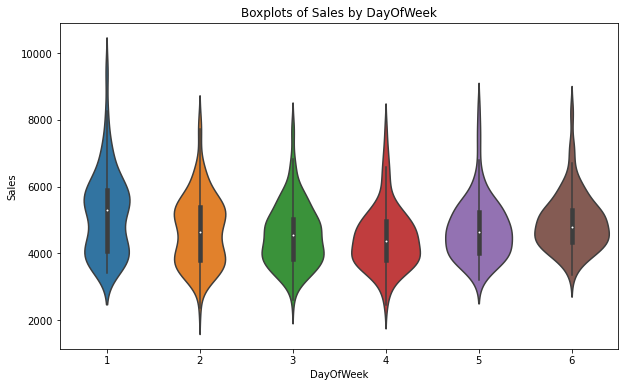

In [9]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Boxplots of Sales by DayOfWeek')
sns.violinplot(x='DayOfWeek', y='Sales', data=target_store_df)
plt.show()

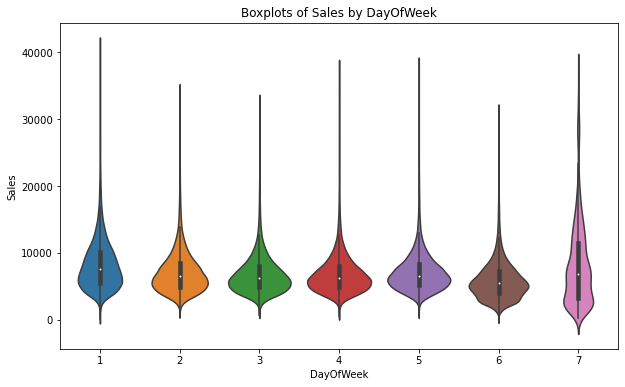

In [10]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Boxplots of Sales by DayOfWeek')
sns.violinplot(x='DayOfWeek', y='Sales', data=df)
plt.show()

In [18]:
cond = (df_merged['Promo'] == 1) & (df_merged['Promo2'] == 1)
# Calculate the mean of 'sales' for rows where 'promo' column is 1
mean_sales_with_promo = df_merged.loc[cond, 'Sales'].mean()
print('all stores with cond: ', mean_sales_with_promo)

cond = (df_merged['Promo'] == 1) & (df_merged['Promo2'] == 0)
# Calculate the mean of 'sales' for rows where 'promo' column is 1
mean_sales_with_promo = df_merged.loc[cond, 'Sales'].mean()
print('all stores with cond: ', mean_sales_with_promo)

all stores with cond:  7836.672986639697
all stores with cond:  8618.452062114759


In [24]:
pd.options.mode.chained_assignment = None

def RMSPE(y, yhat):
    
    n = len(y)
    
    return np.sqrt(1/n * np.sum(((y-yhat)/y)**2))


unique_values = df_test['Store'].unique()


# train a RF for each store
for target_store_number in unique_values:
    # Store number to filter
    #target_store_number = 1
    
    # Filtering the DataFrame by store
    target_store_df = df.loc[df['Store'] == target_store_number]
    
    
    # Filtering the DataFrame by Sales=0
    no_sale = df.loc[df['Sales'] < 10]
    
    


    
    train_data = target_store_df.drop(['Store', 'Date', 'StateHoliday', 'Open', 'Customers'], axis=1)
    
    
    features = train_data.drop('Sales', axis=1)
    target = train_data['Sales']
    
    features_mean = features.mean()
    features_std = features.std()
    
    target_mean = target.mean()
    target_std = target.std()
    
    features = (features - features_mean) / features_std
    target = (target - target_mean) / target_std
    
    
    
    
    
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    
    # Initialize the Random Forest Regressor model
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    
    # Train the model on the training data
    random_forest_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = random_forest_model.predict(X_test)
    
    predictions = (predictions * target_std) + target_mean
    y_test = (y_test * target_std) + target_mean
    
    print(f'RMSPE for store {target_store_number} on val set = ', RMSPE(y_test, predictions))
    
    #################################################################################
    
    # Filtering the DataFrame by store
    target_store_df_test = df_test.loc[df_test['Store'] == target_store_number]
    
    
    test_data = target_store_df_test.drop(['Store', 'Date', 'StateHoliday', 'Open', 'Id'], axis=1)
    test_data_sn = (test_data - features_mean) / features_std
    
    # Make predictions on the test data
    predictions_test = random_forest_model.predict(test_data_sn)
    
    predictions_test = (predictions_test * target_std) + target_mean
    
    target_store_df_test['predict'] = predictions_test
    
    target_store_df_test.loc[target_store_df_test['Open'] == 0, 'predict'] = 0
    
    df_submit.loc[target_store_df_test['Id']-1, 'Sales'] = target_store_df_test['predict'].values



df_submit.to_csv('sample_submission.csv', index=False)

RMSPE for store 1 on val set =  0.1146137826385986
RMSPE for store 3 on val set =  0.14508488983713086
RMSPE for store 7 on val set =  0.14586251231598174
RMSPE for store 8 on val set =  0.17678844075403505
RMSPE for store 9 on val set =  0.20662790593268832
RMSPE for store 10 on val set =  0.10512132372190229
RMSPE for store 11 on val set =  0.1335096974308263
RMSPE for store 12 on val set =  0.1308791170554027
RMSPE for store 13 on val set =  0.1421576448529623
RMSPE for store 14 on val set =  0.12621768749204948
RMSPE for store 15 on val set =  0.13525818898201591
RMSPE for store 16 on val set =  0.1391606148292463
RMSPE for store 19 on val set =  0.1559163921362066
RMSPE for store 20 on val set =  0.2049735881828396
RMSPE for store 21 on val set =  0.16326986825441492
RMSPE for store 22 on val set =  0.1294315698010353
RMSPE for store 23 on val set =  0.13607240124925973
RMSPE for store 24 on val set =  0.13855436981518154
RMSPE for store 25 on val set =  0.29573675122693754
RMSPE 

RMSPE for store 201 on val set =  0.1856296844274652
RMSPE for store 202 on val set =  0.14661945916744235
RMSPE for store 204 on val set =  0.11319730772141916
RMSPE for store 206 on val set =  0.19700996585515806
RMSPE for store 207 on val set =  0.10070873388833608
RMSPE for store 209 on val set =  0.4224788845636397
RMSPE for store 210 on val set =  0.1487879972001051
RMSPE for store 212 on val set =  0.14846787341246487
RMSPE for store 213 on val set =  0.1761371132043589
RMSPE for store 214 on val set =  0.19540212415814853
RMSPE for store 215 on val set =  0.15780763124812539
RMSPE for store 216 on val set =  0.15195829664325233
RMSPE for store 217 on val set =  0.12843387292936068
RMSPE for store 218 on val set =  0.113719471554662
RMSPE for store 219 on val set =  0.17806516508135561
RMSPE for store 220 on val set =  0.15416359601377047
RMSPE for store 221 on val set =  0.15132604282531614
RMSPE for store 224 on val set =  0.19759835937480957
RMSPE for store 226 on val set =  

RMSPE for store 403 on val set =  0.20484396757818427
RMSPE for store 404 on val set =  0.2338771183201484
RMSPE for store 405 on val set =  0.13880164560606537
RMSPE for store 406 on val set =  0.25609723981794597
RMSPE for store 407 on val set =  0.1862554892757497
RMSPE for store 408 on val set =  0.11944722814014529
RMSPE for store 409 on val set =  0.14191000680225793
RMSPE for store 410 on val set =  0.1974489319705066
RMSPE for store 411 on val set =  0.1168909115541871
RMSPE for store 412 on val set =  0.12003734656417886
RMSPE for store 413 on val set =  0.11871683163252522
RMSPE for store 414 on val set =  0.12854051830388796
RMSPE for store 415 on val set =  0.2575259774075846
RMSPE for store 416 on val set =  0.10243650406500915
RMSPE for store 417 on val set =  0.14290619876419725
RMSPE for store 418 on val set =  0.1607809975484084
RMSPE for store 420 on val set =  0.18400531290859157
RMSPE for store 421 on val set =  0.14859634276467648
RMSPE for store 422 on val set =  

RMSPE for store 592 on val set =  0.22579102536172305
RMSPE for store 593 on val set =  0.16834453675621408
RMSPE for store 597 on val set =  0.23957367926485457
RMSPE for store 598 on val set =  0.12131663470316298
RMSPE for store 600 on val set =  0.1354926499896875
RMSPE for store 601 on val set =  0.1245947444168679
RMSPE for store 602 on val set =  0.10167105967230408
RMSPE for store 603 on val set =  0.14022480406283952
RMSPE for store 604 on val set =  0.15558948959930408
RMSPE for store 605 on val set =  0.16256759918708483
RMSPE for store 610 on val set =  0.11788974351282076
RMSPE for store 611 on val set =  0.12995269828513348
RMSPE for store 612 on val set =  0.15426821427388332
RMSPE for store 615 on val set =  0.16677513123671042
RMSPE for store 616 on val set =  0.12131077319895511
RMSPE for store 618 on val set =  0.14487618348111617
RMSPE for store 619 on val set =  0.15177786124906026
RMSPE for store 620 on val set =  0.12784311373088547
RMSPE for store 621 on val set

RMSPE for store 795 on val set =  0.18847184307661494
RMSPE for store 796 on val set =  0.14536479903354643
RMSPE for store 797 on val set =  0.20633294604662558
RMSPE for store 799 on val set =  0.12467947745460141
RMSPE for store 800 on val set =  0.1937673493202209
RMSPE for store 801 on val set =  0.13463224827142614
RMSPE for store 802 on val set =  0.11751654441922953
RMSPE for store 803 on val set =  0.2015208514162853
RMSPE for store 804 on val set =  0.14715108983948702
RMSPE for store 805 on val set =  0.19892054116697624
RMSPE for store 806 on val set =  0.12430312929157647
RMSPE for store 807 on val set =  0.09499648388131401
RMSPE for store 809 on val set =  0.560296054756899
RMSPE for store 810 on val set =  0.10584787399546407
RMSPE for store 811 on val set =  0.1085527588777504
RMSPE for store 813 on val set =  0.10530682738275929
RMSPE for store 815 on val set =  0.2794472366595471
RMSPE for store 816 on val set =  0.2071918001800802
RMSPE for store 818 on val set =  0

RMSPE for store 997 on val set =  0.1383347646240284
RMSPE for store 998 on val set =  0.12441852106778922
RMSPE for store 1000 on val set =  0.15060988588941876
RMSPE for store 1003 on val set =  0.22795263861747056
RMSPE for store 1004 on val set =  0.16383466176855957
RMSPE for store 1005 on val set =  0.11430570041212772
RMSPE for store 1007 on val set =  0.13883624154561922
RMSPE for store 1008 on val set =  0.12555938523729945
RMSPE for store 1009 on val set =  0.12782731568580594
RMSPE for store 1010 on val set =  0.14279723922859985
RMSPE for store 1011 on val set =  0.24409558875727197
RMSPE for store 1012 on val set =  0.14411598626028313
RMSPE for store 1013 on val set =  0.1653253510451128
RMSPE for store 1014 on val set =  0.1928805920883697
RMSPE for store 1015 on val set =  0.1483707830671376
RMSPE for store 1016 on val set =  0.26905905574062605
RMSPE for store 1019 on val set =  0.14401087393690037
RMSPE for store 1020 on val set =  0.10249621977084684
RMSPE for store 